# Subject-Verb-Object Triplet Embedding Model: Experiments


In this work, I tried to compare several models below:

- Model1 (baseline model): Ding et al(2013) original event embedding model with mini-batch gradient descent
- Model2: original model + **incorporating learning parameter E (word vector matrix)**
- Model3: original model + incorporating learning parameter E (word vector matrix) + **lstm-based**

Also, our event embedding model's input data are:
- (S,V,O) triplets extracted from **StanfordCoreNLP's openIE**
- (S,V,O) triplets extracted from **NP and VP chunker**

In [1]:
dat_path = '/home/junhyuki/DLproject/DAT'
res_path = '/home/junhyuki/DLproject/RES'

In [2]:
import os
print(os.getcwd())
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import sys
sys.path.append('/home/junhyuki/DLproject/PSC/4-EventEmb')
import numpy as np
import tensorflow as tf

/home/junhyuki/DLproject/PSC/4-EventEmb


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Model1: baseline model (Ding et al. 2013)

## load embedding model

In [3]:
tf.reset_default_graph()
import TripletEmb_v1_BN as model
import TripletEmb_v1_BN_TripletLoss as model

## read data

In [4]:
# Some hyperparameters
d, w = 100, 7
margin = 10.
init_width= 0.7
# min_lr, max_lr = 0.0000006, 0.000001
min_lr, max_lr = 0.00000006, 0.0000001
k, l = 80, 80
stop_criterion = 0.1
C, keep_ratio, batch_size, epoch, lambda_value = 3, 0.7, 256, 100, 0.0001

In [5]:
print('load training data for event embedding model')
vecS = np.load(dat_path + '/4-SVO_vector/vecS_chunker_unique_d{}_w{}.npy'.format(d, w))
vecV = np.load(dat_path + '/4-SVO_vector/vecV_chunker_unique_d{}_w{}.npy'.format(d, w))
vecO = np.load(dat_path + '/4-SVO_vector/vecO_chunker_unique_d{}_w{}.npy'.format(d, w))
print(vecS.shape)

load training data for event embedding model
(806055, 100)


In [ ]:
# save_path = res_path + '/TripletEmb_v1_e100_d100_w7_k{}_l{}_C{}_lr{}'.format(k, l, C, max_lr)
save_path = res_path + '/TripletEmb_v1_TL_e100_d100_w7_k{}_l{}_C{}_init{}_lr{}'.format(k, l, C, init_width, max_lr)
# save_path = res_path + '/TripletEmb_v1_TL_e100_d100_w7_k{}_l{}_C{}_lr{}_hidden{}'.format(k, l, C, max_lr, 5)

try:
    os.mkdir(save_path)
except:
    pass

## training: mini-batch gradient desecent with cyclical learning rate (CLR)

In [ ]:
print("Start Training")
tf.reset_default_graph()
config = tf.ConfigProto(allow_soft_placement=True, log_device_placement=True)
config.intra_op_parallelism_threads = 44
config.inter_op_parallelism_threads = 44
NTNgraph = tf.Graph()      

with tf.Session(config=config, graph=NTNgraph) as session:
    with tf.device("/gpu:0"):
        TripletEmb = model.TripletEmbedding(d=d,
                                            k=k,
                                            l=l,
                                            C=C,
                                            init_width=init_width,
                                            margin=margin,
                                            min_lr=min_lr,
                                            max_lr=max_lr,
                                            keep_ratio=keep_ratio,
                                            phase=True,
                                            method='GD',
                                            batch_size=batch_size,
                                            epoch=epoch,
                                            stop_criterion=stop_criterion,
                                            lambda_value=lambda_value,
                                            session=session,
                                            result_save_path = save_path,
                                            log_save_path = save_path,
                                            log_save_filename = 'training_log')  
        TripletEmb.train(vecS, vecV, vecO)

Start Training
Preparing optimization by Gradient Descent with CLR


2018-08-28 20:35:54,242 INFO Global Variables are Initialized 


----------------- All Trainable Parameters -----------------
<tf.Variable 'layer_first/Tensor1:0' shape=(80, 100, 100) dtype=float32_ref>
<tf.Variable 'layer_first/Weight1:0' shape=(200, 80) dtype=float32_ref>
<tf.Variable 'layer_first/bias1:0' shape=(1, 80) dtype=float32_ref>
<tf.Variable 'layer_second/Tensor2:0' shape=(80, 100, 100) dtype=float32_ref>
<tf.Variable 'layer_second/Weight2:0' shape=(200, 80) dtype=float32_ref>
<tf.Variable 'layer_second/bias2:0' shape=(1, 80) dtype=float32_ref>
<tf.Variable 'layer_third/Tensor3:0' shape=(80, 80, 80) dtype=float32_ref>
<tf.Variable 'layer_third/Weight3:0' shape=(160, 80) dtype=float32_ref>
<tf.Variable 'layer_third/bias3:0' shape=(1, 80) dtype=float32_ref>
<tf.Variable 'layer_third/score_params:0' shape=(1, 80) dtype=float32_ref>
<tf.Variable 'batch_normalization/gamma:0' shape=(80,) dtype=float32_ref>
<tf.Variable 'batch_normalization/beta:0' shape=(80,) dtype=float32_ref>
<tf.Variable 'batch_normalization/moving_mean:0' shape=(80,) dtyp

2018-08-28 20:36:22,024 INFO ------------------------------------------------ 
2018-08-28 20:36:22,026 INFO learning rate: 6.505557319784058e-08 
2018-08-28 20:36:22,027 INFO Epoch Number is 1 / Item number is 200 
2018-08-28 20:36:22,028 INFO 6.683302561442058 / 6.66033935546875 
2018-08-28 20:36:47,986 INFO ------------------------------------------------ 
2018-08-28 20:36:47,987 INFO learning rate: 7.013655128612257e-08 
2018-08-28 20:36:47,988 INFO Epoch Number is 1 / Item number is 400 
2018-08-28 20:36:47,989 INFO 6.958974202473958 / 6.936010996500651 
2018-08-28 20:37:12,228 INFO ------------------------------------------------ 
2018-08-28 20:37:12,229 INFO learning rate: 7.521752937440457e-08 
2018-08-28 20:37:12,230 INFO Epoch Number is 1 / Item number is 600 
2018-08-28 20:37:12,231 INFO 7.020974477132161 / 6.9980112711588545 
2018-08-28 20:37:35,684 INFO ------------------------------------------------ 
2018-08-28 20:37:35,685 INFO learning rate: 8.029850746268657e-08 
2018-

2018-08-28 20:47:01,422 INFO ------------------------------------------------ 
2018-08-28 20:47:01,423 INFO learning rate: 6.88917116544935e-08 
2018-08-28 20:47:01,424 INFO Epoch Number is 2 / Item number is 2800 
2018-08-28 20:47:01,426 INFO 3.9667177200317383 / 3.9437548319498696 
2018-08-28 20:47:14,297 INFO ------------------------------------------------ 
2018-08-28 20:47:14,299 INFO learning rate: 6.381073356621148e-08 
2018-08-28 20:47:14,300 INFO Epoch Number is 2 / Item number is 3000 
2018-08-28 20:47:14,301 INFO 3.773351033528646 / 3.7503881454467773 
2018-08-28 20:47:23,794 INFO =========== 2 Epoch is done =========== 
2018-08-28 20:47:23,795 INFO 2 Epoch loss: 4.460922842748806 
2018-08-28 20:47:23,797 INFO 2 Epoch Margin loss: 4.437955821950686 
2018-08-28 20:47:23,798 INFO 2 epoch time is: 11.49068439801534 minutes 
2018-08-28 20:47:51,005 INFO ------------------------------------------------ 
2018-08-28 20:47:51,006 INFO learning rate: 6.50555731978406e-08 
2018-08-28 

2018-08-28 20:58:00,766 INFO ------------------------------------------------ 
2018-08-28 20:58:00,768 INFO learning rate: 8.413464591933948e-08 
2018-08-28 20:58:00,769 INFO Epoch Number is 4 / Item number is 2200 
2018-08-28 20:58:00,770 INFO 2.4654154777526855 / 2.442452589670817 
2018-08-28 20:58:17,250 INFO ------------------------------------------------ 
2018-08-28 20:58:17,251 INFO learning rate: 7.905366783105748e-08 
2018-08-28 20:58:17,252 INFO Epoch Number is 4 / Item number is 2400 
2018-08-28 20:58:17,253 INFO 2.1760993003845215 / 2.153136412302653 
2018-08-28 20:58:32,747 INFO ------------------------------------------------ 
2018-08-28 20:58:32,748 INFO learning rate: 7.397268974277548e-08 
2018-08-28 20:58:32,750 INFO Epoch Number is 4 / Item number is 2600 
2018-08-28 20:58:32,751 INFO 2.28568696975708 / 2.2627240816752114 
2018-08-28 20:58:47,617 INFO ------------------------------------------------ 
2018-08-28 20:58:47,619 INFO learning rate: 6.889171165449347e-08 


2018-08-28 21:07:25,804 INFO ------------------------------------------------ 
2018-08-28 21:07:25,805 INFO learning rate: 9.937758018418548e-08 
2018-08-28 21:07:25,806 INFO Epoch Number is 6 / Item number is 1600 
2018-08-28 21:07:25,807 INFO 1.5354084968566895 / 1.5124457677205403 
2018-08-28 21:07:44,360 INFO ------------------------------------------------ 
2018-08-28 21:07:44,361 INFO learning rate: 9.429660209590345e-08 
2018-08-28 21:07:44,362 INFO Epoch Number is 6 / Item number is 1800 
2018-08-28 21:07:44,363 INFO 1.442125956217448 / 1.4191632270812988 
2018-08-28 21:08:02,145 INFO ------------------------------------------------ 
2018-08-28 21:08:02,146 INFO learning rate: 8.921562400762148e-08 
2018-08-28 21:08:02,147 INFO Epoch Number is 6 / Item number is 2000 
2018-08-28 21:08:02,148 INFO 1.395084540049235 / 1.372121810913086 
2018-08-28 21:08:18,329 INFO ------------------------------------------------ 
2018-08-28 21:08:18,330 INFO learning rate: 8.413464591933944e-08 

2018-08-28 21:16:27,041 INFO ------------------------------------------------ 
2018-08-28 21:16:27,042 INFO learning rate: 8.537948555096854e-08 
2018-08-28 21:16:27,043 INFO Epoch Number is 8 / Item number is 1000 
2018-08-28 21:16:27,044 INFO 0.7885708808898926 / 0.7656081517537435 
2018-08-28 21:16:48,350 INFO ------------------------------------------------ 
2018-08-28 21:16:48,352 INFO learning rate: 9.046046363925057e-08 
2018-08-28 21:16:48,353 INFO Epoch Number is 8 / Item number is 1200 
2018-08-28 21:16:48,354 INFO 0.7032742500305176 / 0.6803115208943685 
2018-08-28 21:17:08,781 INFO ------------------------------------------------ 
2018-08-28 21:17:08,782 INFO learning rate: 9.554144172753254e-08 
2018-08-28 21:17:08,783 INFO Epoch Number is 8 / Item number is 1400 
2018-08-28 21:17:08,784 INFO 0.7896265188852946 / 0.7666637897491455 
2018-08-28 21:17:28,306 INFO ------------------------------------------------ 
2018-08-28 21:17:28,307 INFO learning rate: 9.937758018418548e-

2018-08-28 21:24:54,339 INFO 0.4592219591140747 / 0.4362592299779256 
2018-08-28 21:25:20,160 INFO ------------------------------------------------ 
2018-08-28 21:25:20,161 INFO learning rate: 7.013655128612257e-08 
2018-08-28 21:25:20,162 INFO Epoch Number is 10 / Item number is 400 
2018-08-28 21:25:20,163 INFO 0.5275368293126425 / 0.5045741001764933 
2018-08-28 21:25:45,498 INFO ------------------------------------------------ 
2018-08-28 21:25:45,499 INFO learning rate: 7.521752937440453e-08 
2018-08-28 21:25:45,500 INFO Epoch Number is 10 / Item number is 600 
2018-08-28 21:25:45,501 INFO 0.43686334292093915 / 0.41390061378479004 
2018-08-28 21:26:09,646 INFO ------------------------------------------------ 
2018-08-28 21:26:09,647 INFO learning rate: 8.02985074626865e-08 
2018-08-28 21:26:09,648 INFO Epoch Number is 10 / Item number is 800 
2018-08-28 21:26:09,649 INFO 0.4584832986195882 / 0.43552056948343915 
2018-08-28 21:26:32,018 INFO -----------------------------------------

2018-08-28 21:34:25,935 INFO learning rate: 6.889171165449355e-08 
2018-08-28 21:34:25,936 INFO Epoch Number is 11 / Item number is 2800 
2018-08-28 21:34:25,937 INFO 0.3010305364926656 / 0.27806780735651654 
2018-08-28 21:34:40,183 INFO ------------------------------------------------ 
2018-08-28 21:34:40,184 INFO learning rate: 6.381073356621143e-08 
2018-08-28 21:34:40,185 INFO Epoch Number is 11 / Item number is 3000 
2018-08-28 21:34:40,186 INFO 0.27735811471939087 / 0.25439538558324176 
2018-08-28 21:34:49,990 INFO =========== 11 Epoch is done =========== 
2018-08-28 21:34:49,991 INFO 11 Epoch loss: 0.3369802165677437 
2018-08-28 21:34:49,992 INFO 11 Epoch Margin loss: 0.3140136027274931 
2018-08-28 21:34:49,993 INFO 11 epoch time is: 58.92726815541585 minutes 
2018-08-28 21:35:18,267 INFO ------------------------------------------------ 
2018-08-28 21:35:18,268 INFO learning rate: 6.50555731978406e-08 
2018-08-28 21:35:18,269 INFO Epoch Number is 12 / Item number is 200 
2018-08

2018-08-28 21:45:00,216 INFO ------------------------------------------------ 
2018-08-28 21:45:00,217 INFO learning rate: 8.413464591933944e-08 
2018-08-28 21:45:00,218 INFO Epoch Number is 13 / Item number is 2200 
2018-08-28 21:45:00,219 INFO 0.22244075934092203 / 0.19947805007298788 
2018-08-28 21:45:29,120 INFO ------------------------------------------------ 
2018-08-28 21:45:29,122 INFO learning rate: 7.905366783105748e-08 
2018-08-28 21:45:29,123 INFO Epoch Number is 13 / Item number is 2400 
2018-08-28 21:45:29,124 INFO 0.2479456663131714 / 0.22498295704523721 
2018-08-28 21:45:59,421 INFO ------------------------------------------------ 
2018-08-28 21:45:59,429 INFO learning rate: 7.397268974277551e-08 
2018-08-28 21:45:59,430 INFO Epoch Number is 13 / Item number is 2600 
2018-08-28 21:45:59,431 INFO 0.2203469475110372 / 0.19738423824310303 
2018-08-28 21:46:15,206 INFO ------------------------------------------------ 
2018-08-28 21:46:15,208 INFO learning rate: 6.8891711654

2018-08-28 21:54:21,590 INFO 0.1990179419517517 / 0.17605523268381754 
2018-08-28 21:54:41,106 INFO ------------------------------------------------ 
2018-08-28 21:54:41,108 INFO learning rate: 9.937758018418548e-08 
2018-08-28 21:54:41,109 INFO Epoch Number is 15 / Item number is 1600 
2018-08-28 21:54:41,110 INFO 0.17364788055419922 / 0.15068517128626505 
2018-08-28 21:55:00,213 INFO ------------------------------------------------ 
2018-08-28 21:55:00,214 INFO learning rate: 9.429660209590352e-08 
2018-08-28 21:55:00,215 INFO Epoch Number is 15 / Item number is 1800 
2018-08-28 21:55:00,216 INFO 0.19000297784805298 / 0.1670402685801188 
2018-08-28 21:55:17,639 INFO ------------------------------------------------ 
2018-08-28 21:55:17,640 INFO learning rate: 8.921562400762141e-08 
2018-08-28 21:55:17,641 INFO Epoch Number is 15 / Item number is 2000 
2018-08-28 21:55:17,642 INFO 0.2172249952952067 / 0.19426228602727255 
2018-08-28 21:55:34,397 INFO -----------------------------------

In [ ]:
# tensors = [n.name for n in NTNgraph.as_graph_def().node]
# print(tensors)

# Appendix

## Cyclical Learning Rate (CLR) what I used for training

max iter: 3935


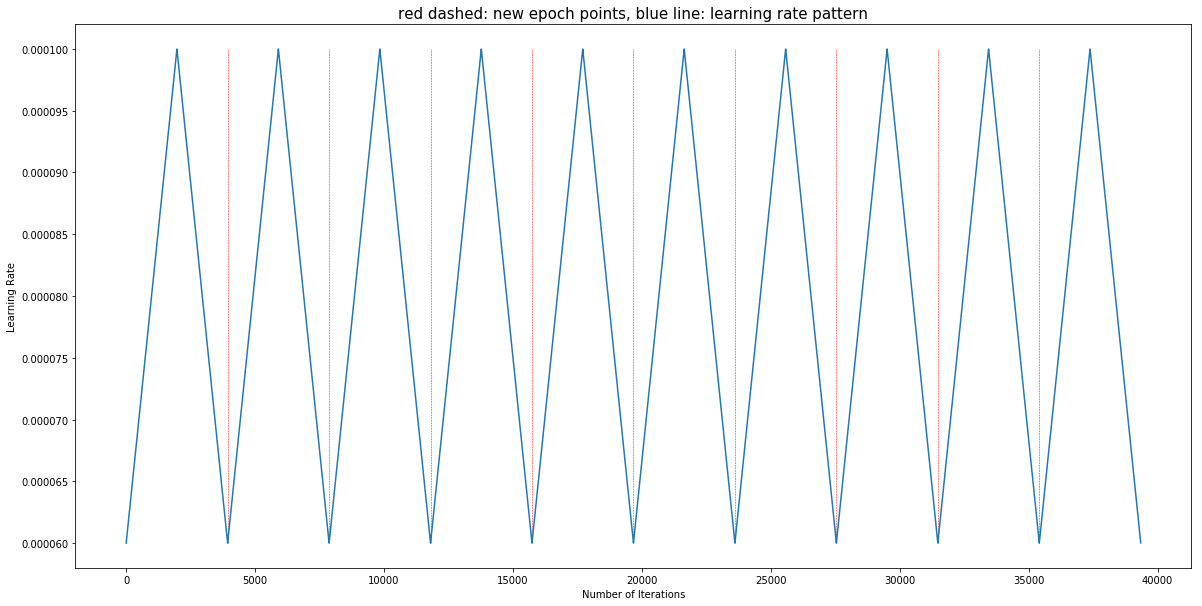

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
data_size = 1007314
batch_size = 256
max_iter = math.ceil(data_size/batch_size)
print("max iter: " + str(max_iter))

min_lr = 0.00006
max_lr = 0.0001
step_size = max_iter / 2
epoch = 10

lr_schedule = []
for epochCounter in range(max_iter*epoch):
    cycle = math.floor(1 + epochCounter/(2*step_size))
    x = abs(epochCounter / step_size - 2*cycle + 1)
    lr = min_lr + (max_lr - min_lr)*max(0, (1 - x))
    lr_schedule.append(lr)
    
plt.figure(figsize=(20,10))
plt.plot(lr_schedule)
plt.vlines(x=np.arange(max_iter, max_iter*epoch, step=max_iter), ymin=min_lr, ymax=max_lr,
           color='red', linestyle='dashed', linewidth=0.5)
plt.ylabel("Learning Rate")
plt.xlabel("Number of Iterations")
plt.title("red dashed: new epoch points, blue line: learning rate pattern", fontsize=15)
plt.show()

## Data Descriptions

In [1]:
dat_path = '/home/junhyuki/DLproject/DAT'
res_path = '/home/junhyuki/DLproject/RES'

import pandas as pd
import numpy as np
from collections import Counter

svo = pd.read_csv(dat_path + '/2-SVO/SVO_chunker_final_unique.csv', encoding='utf-8-sig')

In [3]:
Counter(np.array(svo['subject'])).most_common()

[('China', 5394),
 ('U.S.', 5206),
 ('Wall St', 4983),
 ('Russia', 3196),
 ('Fitch', 2987),
 ('Obama', 2660),
 ('European shares', 2462),
 ('TSX', 2286),
 ('EU', 2112),
 ('Euro', 1893),
 ('Dollar', 1841),
 ('Trump', 1710),
 ('Australia shares', 1586),
 ('France', 1547),
 ('Hong Kong shares', 1459),
 ('India', 1383),
 ('Brazil', 1331),
 ('Germany', 1290),
 ('Futures', 1271),
 ('Gold', 1262),
 ('Iran', 1246),
 ('Turkey', 1242),
 ('Britain', 1164),
 ('Greece', 1156),
 ('Nikkei', 1141),
 ('Wall Street', 1114),
 ('Japan', 1081),
 ('Seoul shares', 1010),
 ('Egypt', 991),
 ('Stocks', 971),
 ('UK', 941),
 ('White House', 931),
 ('Canada', 883),
 ('IMF', 875),
 ('Oil', 863),
 ('Indian shares', 850),
 ('ECB', 823),
 ('U.N.', 812),
 ('S&P;', 806),
 ("Britain's FTSE", 790),
 ('Italy', 789),
 ('Spain', 769),
 ('Putin', 762),
 ('Indonesia', 760),
 ('FDA', 748),
 ('Judge', 709),
 ('Merkel', 703),
 ('Sterling', 697),
 ('GM', 683),
 ('Mexico', 683),
 ('Argentina', 676),
 ('Israel', 664),
 ('China stock

In [4]:
Counter(np.array(svo['verb'])).most_common()

[('says', 85250),
 ('sees', 18023),
 ('reports', 11283),
 ('announces', 11234),
 ('Announces', 11017),
 ('posts', 9265),
 ('to buy', 7681),
 ('raises', 7386),
 ('rises', 6928),
 ('falls', 6893),
 ('gets', 6653),
 ('wins', 6440),
 ('fall', 5708),
 ('sells', 5609),
 ('rise', 5523),
 ('buys', 5218),
 ('to sell', 5096),
 ('plans', 4900),
 ('hit', 4649),
 ('seeks', 4498),
 ('calls', 4413),
 ('Says', 4382),
 ('warns', 4234),
 ('to pay', 3943),
 ('sets', 3929),
 ('urges', 3835),
 ('approves', 3815),
 ('appoints', 3740),
 ('hits', 3582),
 ('killed', 3379),
 ('takes', 3358),
 ('expects', 3174),
 ('set', 2903),
 ('launches', 2677),
 ('files', 2641),
 ('faces', 2589),
 ('Reports', 2577),
 ('ends', 2516),
 ('say', 2479),
 ('receives', 2468),
 ('cuts', 2390),
 ('adds', 2347),
 ('opens', 2327),
 ('holds', 2279),
 ('to invest', 2259),
 ('acquires', 2258),
 ('makes', 2248),
 ('drops', 2218),
 ('to issue', 2209),
 ('edge', 2155),
 ('kills', 2133),
 ('to raise', 2108),
 ('to Present', 2043),
 ('to cut',

In [5]:
Counter(np.array(svo['object'])).most_common()

[('down', 375),
 ('Quarterly Dividend', 367),
 ('trading halt', 331),
 ('estimates', 322),
 ('change of accounting policy', 300),
 ('2017 dividend payment', 283),
 ('regulatory approval for private placement', 278),
 ('Second Quarter 2015 Results', 172),
 ('no dividend payment for 2017', 167),
 ('up', 164),
 ('2015 dividend payment date', 162),
 ('Second Quarter 2015 Financial Results', 160),
 ('Quarterly Cash Dividend', 149),
 ('patent', 147),
 ('at Upcoming Investor Conferences', 140),
 ('First Quarter 2015 Financial Results', 136),
 ('for IPO', 135),
 ('pending announcement', 134),
 ('trade pending announcement', 133),
 ('capital increase', 124),
 ('First Quarter 2015 Results', 120),
 ('forecasts', 119),
 ('in April', 118),
 ('new CEO', 114),
 ('change in accounting policy', 113),
 ('expectations', 112),
 ('Third Quarter 2015 Financial Results', 111),
 ('Trading Halt', 110),
 ('for bankruptcy', 106),
 ('in August', 101),
 ('forecast', 96),
 ('in June', 94),
 ('for non-timely 10-Q', 

## Learning rate scheduling and find good start point

I refered `Cyclical Learning Rates for Training Neural Networks (2015, Leslie N. Smith)` paper.

First of all, I experiment 'learning rate range test' with learning rate schedule below:

```python
lr_schedule = [0.00001, 0.00002, 0.00004, 0.00006, 0.00008,
               0.0001, 0.0002, 0.0004, 0.0006, 0.0008,
               0.001, 0.002, 0.004, 0.006, 0.008,
               0.01, 0.02, 0.04, 0.06, 0.08, 0.1]
```


It turns out that from epoch 5 to epoch 6, losses are improved significantly, and from epoch 11 to epoch 12, losses are badly performed. Hence, for safety, I decided the **minimum learning rate = 0.0001** to **maximum learning rate = 0.0006**

However, after some experiments, even when the learning rate exceed 0.0002, losses are increased. So, I changed **minimum learning rate = 0.00006** to **maximum learning rate = 0.0001**